# Data Analysis A Bayesian Tutorial

working out of Second Edition by D.S. Sivia


Baye's Theorem: 
$$\begin{equation}
\label{eq:bayes}
P(\theta|\textbf{D},I) = P(D|\theta,I ) \frac{P(\theta| I)}{P(\textbf{D}| I)}
\end{equation}$$
Where $\theta$ is a parameter in a model described by I and D is the data.

In the case of beginning with a set of data points $(x_i,y_i\pm \sigma_y)$, where the uncertainty on y is a constant for each data point. y_i also has some error in the measurement, desrcibed by a Gaussian around the true value $\hat{y_i}$ and the uncertainty on $\sigma_y$.

In other words, $y_i=\hat{y_i}+\epsilon$ and $\epsilon$ follows a Normal distribution about $\hat{y_i}$.

It is known that the relationship between the true values that we are trying to measure is $\hat{y_i}=f(\hat{x_i})=a\hat{x_i}+b.$ a and b are the parameters that I will try to estimate using Baye's theorem. 

The probability of getting a value $y_i$ given $x_i$,a, and b is then given by a Gaussian:

$P(y_i|x_i,a,b,I)=N(ax_i+b,\sigma_y)$

If I assume a flat prior (no inital preference for the values of a and b) since I have not seen the data, the prior term can be neglected. Further, if I am estimating parameters and do not care about the true value of $P(\theta|\textbf{D},I)$ then the evidence can also be neglected. 

This yields $P(\theta|\textbf{D},I) = P(D|\theta,I )$
This is the beauty of Baye's theorem since it will be easier to determine the evidence than the posterior.

For each data point k in the N amount of data the likelihood can be calculated. For the overall likelihood these can be multiplied. 
Solving analytically, one can find that 
$P(\theta|\textbf{D},I) = P(D|\theta,I )=\prod_{k=1}^{N}\frac{1}{\sigma_y\sqrt{2\pi}}\exp(\frac{-(y_k-(ax_k+b))^2}{2\sigma_y})$

Now that I know my probability distribution for a given data, I simply need to find the a and b parameters in my model that make this most likely. This turns it into a $\chi^2$ minimization problem. If I take the logarithm of P I get:
$L(\theta|\textbf{D},I) = L(D|\theta,I )=\sum_{k=1}^{N}constant+(\frac{-(y_k-(ax_k+b))^2}{2\sigma_y})=\sum_{k=1}^{N}constant+\chi^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set parameters, arrays
a=2
b=3
sig_y=0.05
data_len=10
y_i=np.zeros(data_len)
x_i=np.zeros(data_len)

def y_hat(x_i):
    return(a*x_i+b)

pi=np.pi
e=np.e

In [3]:
#create my Gaussian
def gauss(x,y_data,sig_y,a,b):
    return(1/(sig_y*np.sqrt(2*pi))*e**(-(y_data-(a*x+b))**2/(2*sig_y)))

mean is 13


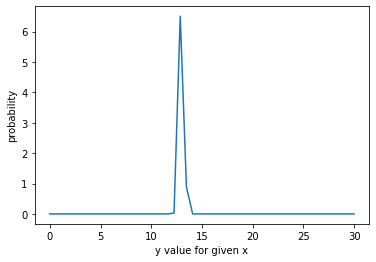

In [4]:
#what does this look like?
y_data=np.linspace(0,a*15)
x_test=5
g=gauss(x_test,y_data, sig_y,a,b)
plt.plot(y_data,g)
plt.xlabel("y value for given x")
plt.ylabel("probability")
print("mean is", a*x_test+b)


So now I have a gaussian that my noise for each data point should follow. For each point $x_k,y_k$ I will know $x_i$ but y_i will be drawn from this gaussian. 

In [5]:
#create my x array, going to choose even spacing
x_i=np.arange(0,data_len)

In [6]:
from numpy import random
for i in range(len(x_i)):
    mean=a*x_i[i]+b
    sigma=sig_y

    s = np.random.normal(mean, sigma, 1)
    y_i[i]=s
    
#print(y_i)



Text(0.5, 0, 'x')

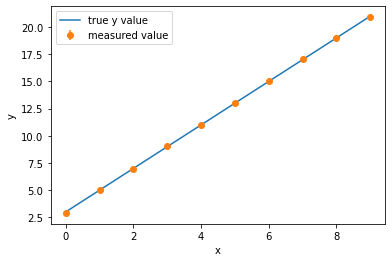

In [7]:
plt.plot(x_i,y_hat(x_i), label="true y value")
plt.errorbar(x_i,y_i, yerr=sig_y, fmt='o', label="measured value")
plt.legend()
plt.ylabel("y")
plt.xlabel("x")

#now I need to fit for my unkown a and b parameter (this assumes I did not know a and b that generated my data)
#essentially I am going to be performing a chi^2 test
#this can be done analytically for this simple problem by taking derivatives of p
#here I am showing a numerical solution

In [8]:
a_guess=np.linspace(a*0.8,a*1.2,500)
b_guess=np.linspace(b*0.8,b*1.2,400)

aa,bb=np.meshgrid(a_guess,b_guess)
chi2vals = np.zeros(np.prod(aa.shape))


def chi2(a_val, b_val,x_i,y_i,sig_y):
    val=np.sum(((y_i-(a_val*x_i+b_val))/(sig_y))**2 )
    return val

# for i in range(len(a_guess)-1):
#     for j in range(len(b_guess)-1):
#         chi2valstest[i][j]=chi2(a_guess[i],b_guess[j],x_i,y_i,sig_y)

for i,(ai,bi) in enumerate(zip(aa.flatten(),bb.flatten())):
    chi2vals[i]=chi2(ai,bi,x_i,y_i,sig_y)
    


Text(0, 0.5, 'b')

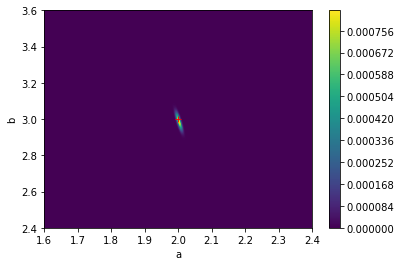

In [9]:
# cp=ax.contour(a_guess,b_guess, chi2vals)

# ax.clabel(cp, inline=True, 
#           fontsize=10)


cp = plt.contourf(aa, bb, np.exp(-0.5*chi2vals.reshape(aa.shape)), levels = 1000)
plt.colorbar(cp)
#plt.imshow(a_guess, b_guess, chi2vals, cmap='hot')
# import seaborn as sns
#ax=sns.heatmap(chi2vals)
plt.scatter(a,b, marker='+', c='r', lw = 0.9)
plt.xlabel("a")
plt.ylabel("b")
# plt.title("$\chi^2$ values for a and b")

So, as we can see $\chi^2$ is minimized at the correct value of a and b, but this minimization occurs over a very long range. Next, I will test how our uncertainty effects this. If $\sigma_y$ is smaller will our parameters be more well constrained?

Surprisingly (are you really *that* surprised? -Ste-), this did not improve our constraint on a and b. 

I may have errors in this code.  (you definitely have. everyone has)


In [10]:
#after this point still working on 

In [11]:
# #code from Walter Del Pozzo
# def FindHeightForLevel(inArr, adLevels):
#    """
#    Computes the height of a :math:`2D` function for given levels

#    :param inArr: function values
#    :type inArr: array
#    :param adLevels: levels
#    :type adLevels: list or array

#    :return: function values with levels closest to *levels*
#    :rtype: array
#    """

#    # flatten the array
#    oldshape = np.shape(inArr)
#    adInput  = np.reshape(inArr,oldshape[0]*oldshape[1])
#    #adInput=inArr

#    # get array specifics
#    nLength  = np.size(adInput)

#    # create reversed sorted list
#    adTemp   = -1.0 * adInput
#    adSorted = np.sort(adTemp)
#    adSorted = -1.0 * adSorted

#    # create the normalised cumulative distribution
#    adCum    = np.zeros(nLength)
#    adCum[0] = adSorted[0]

#    for i in range(1,nLength):
#        adCum[i] = np.logaddexp(adCum[i-1], adSorted[i])

#    adCum    = adCum - adCum[-1]

#    # find the values closest to levels
#    adHeights = []
#    for item in adLevels:
#        idx = (np.abs(adCum-np.log(item))).argmin()
#        adHeights.append(adSorted[idx])

#    adHeights = np.array(adHeights)
#    return np.sort(adHeights)

In [12]:
#test

In [13]:
from credibleregions import FindHeightForLevel as FHFL

In [14]:
#FHFL?

In [29]:
levelval=(FHFL(np.log(chi2vals.reshape(aa.shape)),[0.9]))
print(levelval)
levelval=(levelval[0])
print(levelval)


[8.29689422]
8.296894216066836


In [30]:
#print(chi2vals.reshape(aa.shape))
chi2matrix=chi2vals.copy()
chi2matrix=chi2matrix.reshape(aa.shape)
print(chi2matrix)
# print(len(chi2matrix[:,0]))
# print(aa.shape)

[[28375.09274006 28194.35317544 28014.19963257 ... 10778.22506503
  10888.73830662 10999.83756996]
 [28317.41933738 28136.853353   27956.87339037 ... 10806.82104321
  10917.50786504 11028.78070862]
 [28259.81829605 28079.42589191 27899.61950952 ... 10835.48938274
  10946.34978482 11057.79620865]
 ...
 [11166.78850716 11054.96029909 10943.71811276 ... 27818.86503632
  27998.28963446 28178.30025435]
 [11137.84256222 11026.18793439 10915.1193283  ... 27876.18847224
  28055.78665063 28235.97085076]
 [11108.96897863 10997.48793104 10886.5929052  ... 27933.58426952
  28113.35602815 28293.71380852]]


Text(0, 0.5, 'b')

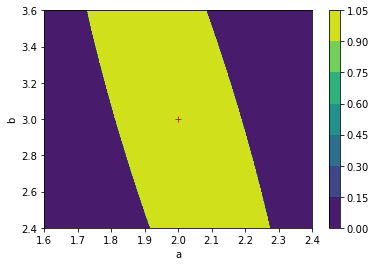

In [34]:


def selectrange(matrix1):
    matrix=np.log(matrix1.copy())
    for j in range(len(matrix[:,0])):
        for k in range(len(matrix[0,:])):
            if matrix[j][k]<=levelval:
                matrix[j][k]=1
                #print(j,k)
            else:
                matrix[j][k]=0
    return matrix

curvematrix=selectrange(chi2matrix)
            
curve90=plt.contourf(aa,bb, curvematrix)
plt.colorbar(curve90)
#plt.legend()
plt.scatter(a,b, marker='+', c='r', lw = 0.9)
plt.xlabel("a")
plt.ylabel("b")
#plt.colorbar(cp)


#print(chi2matrix,"and", curvematrix)

In [27]:

# import numpy as np

# #code from Walter Del Pozzo
# def FindHeightForLevel(inArr, adLevels):
#    """
#    Computes the height of a :math:`2D` function for given levels

#    :param inArr: function values
#    :type inArr: array
#    :param adLevels: levels
#    :type adLevels: list or array

#    :return: function values with levels closest to *levels*
#    :rtype: array
#    """

#    # flatten the array
#    oldshape = np.shape(inArr)
#    adInput  = np.reshape(inArr,oldshape[0]*oldshape[1])
#    #adInput=inArr

#    # get array specifics
#    nLength  = np.size(adInput)

#    # create reversed sorted list
#    adTemp   = -1.0 * adInput
#    adSorted = np.sort(adTemp)
#    adSorted = -1.0 * adSorted

#    # create the normalised cumulative distribution
#    adCum    = np.zeros(nLength)
#    adCum[0] = adSorted[0]

#    for i in range(1,nLength):
#        adCum[i] = np.logaddexp(adCum[i-1], adSorted[i])

#    adCum    = adCum - adCum[-1]

#    # find the values closest to levels
#    adHeights = []
#    for item in adLevels:
#        print(item) 
#        idx = (np.abs(adCum-np.log(item))).argmin()
#        adHeights.append(adSorted[idx])

#    adHeights = np.array(adHeights)
#    return np.sort(adHeights), idx, adCum, adSorted, adCum[-1]

# FindHeightForLevel(np.log(chi2vals.reshape(aa.shape)),[0.5, 0.9])

0.5
0.9


(array([8.29689422, 9.39611922]),
 108220,
 array([-1.07478090e+01, -1.00556786e+01, -9.65083157e+00, ...,
        -2.14864002e-08, -1.07410401e-08,  0.00000000e+00]),
 array([10.25326702, 10.25123242, 10.25039493, ...,  2.65600312,
         2.6522842 ,  2.65188215]),
 0.0)